In [39]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier,  kneighbors_graph
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import seaborn as sns
import os

import joblib

import numpy as np

In [18]:
df = pd.read_csv("final_filter_DF.csv")
df

,AGE,PTEDUCAT,FDG,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_perc_forgetting,...,FSVERSION,IMAGEUID,Hippocampus,mPACCdigit,mPACCtrailsB,FAQTOTAL,ID_faq,ID_neurobat,ADNI_MEM,DX_bl
0,74.3,16,1.336150,0.0,10.67,18.67,5.0,28.0,44.0,54.5455,...,2,3.547500e+04,8336.000000,-4.310280,-4.114430,0.0,4.0,30.0,0.405,0
1,81.3,18,1.108600,4.5,22.00,31.00,8.0,20.0,22.0,100.0000,...,2,3.223700e+04,5319.000000,-16.244900,-15.829900,10.0,8.0,36.0,-1.021,4
2,67.5,10,1.198979,1.0,14.33,21.33,6.0,27.0,37.0,36.3636,...,2,6.463100e+04,6869.000000,-8.421500,-9.449350,0.0,30.0,140.0,-0.009,2
3,73.7,16,1.259560,0.0,8.67,14.67,4.0,29.0,37.0,44.4444,...,2,3.224600e+04,7075.000000,-1.888680,-1.565830,0.0,6.0,32.0,0.743,0
4,80.4,13,1.198979,0.5,18.67,25.67,7.0,25.0,30.0,83.3333,...,2,3.302500e+04,5348.000000,-10.141700,-10.910900,0.0,44.0,182.0,-0.219,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,65.6,17,1.198979,0.0,0.67,0.67,0.0,30.0,59.0,0.0000,...,1,1.633742e+06,7717.300000,5.427020,5.167270,3.0,170293.0,170226.0,2.978,3
2415,61.4,12,1.198979,3.5,20.33,31.33,9.0,28.0,22.0,85.7143,...,3,4.356456e+05,6929.112247,-10.780300,-11.308700,15.0,170102.0,170105.0,-0.844,2
2416,64.6,12,1.198979,0.5,16.33,23.33,7.0,27.0,31.0,75.0000,...,3,4.356456e+05,6929.112247,-9.659400,-7.517550,0.0,171173.0,171669.0,-0.232,2
2417,68.9,18,1.198979,0.5,5.00,7.00,2.0,30.0,45.0,38.4615,...,3,4.356456e+05,6929.112247,2.742450,2.540260,0.0,173878.0,173872.0,1.392,1


In [19]:
X = df.drop(columns=['DX_bl'])
y = df['DX_bl']

In [20]:
display(X), display(y)

,AGE,PTEDUCAT,FDG,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_perc_forgetting,...,FLDSTRENG,FSVERSION,IMAGEUID,Hippocampus,mPACCdigit,mPACCtrailsB,FAQTOTAL,ID_faq,ID_neurobat,ADNI_MEM
0,74.3,16,1.336150,0.0,10.67,18.67,5.0,28.0,44.0,54.5455,...,0,2,3.547500e+04,8336.000000,-4.310280,-4.114430,0.0,4.0,30.0,0.405
1,81.3,18,1.108600,4.5,22.00,31.00,8.0,20.0,22.0,100.0000,...,0,2,3.223700e+04,5319.000000,-16.244900,-15.829900,10.0,8.0,36.0,-1.021
2,67.5,10,1.198979,1.0,14.33,21.33,6.0,27.0,37.0,36.3636,...,0,2,6.463100e+04,6869.000000,-8.421500,-9.449350,0.0,30.0,140.0,-0.009
3,73.7,16,1.259560,0.0,8.67,14.67,4.0,29.0,37.0,44.4444,...,0,2,3.224600e+04,7075.000000,-1.888680,-1.565830,0.0,6.0,32.0,0.743
4,80.4,13,1.198979,0.5,18.67,25.67,7.0,25.0,30.0,83.3333,...,0,2,3.302500e+04,5348.000000,-10.141700,-10.910900,0.0,44.0,182.0,-0.219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,65.6,17,1.198979,0.0,0.67,0.67,0.0,30.0,59.0,0.0000,...,2,1,1.633742e+06,7717.300000,5.427020,5.167270,3.0,170293.0,170226.0,2.978
2415,61.4,12,1.198979,3.5,20.33,31.33,9.0,28.0,22.0,85.7143,...,2,3,4.356456e+05,6929.112247,-10.780300,-11.308700,15.0,170102.0,170105.0,-0.844
2416,64.6,12,1.198979,0.5,16.33,23.33,7.0,27.0,31.0,75.0000,...,2,3,4.356456e+05,6929.112247,-9.659400,-7.517550,0.0,171173.0,171669.0,-0.232
2417,68.9,18,1.198979,0.5,5.00,7.00,2.0,30.0,45.0,38.4615,...,2,3,4.356456e+05,6929.112247,2.742450,2.540260,0.0,173878.0,173872.0,1.392


0       0
1       4
2       2
3       0
4       2
       ..
2414    3
2415    2
2416    2
2417    1
2418    2
Name: DX_bl, Length: 2419, dtype: int64

(None, None)

In [10]:
print('''
"CN": 0,     # Cognitively Normal - Cognitivamente Normal
"EMCI": 1,   # Early Mild Cognitive Impairment - Comprometimento Cognitivo Leve Inicial
"LMCI": 2,   # Late Mild Cognitive Impairment - Comprometimento Cognitivo Leve Avançado
"SMC": 3,    # Significant Memory Concern - Preocupação Significativa com a Memória
"AD": 4,     # Alzheimer's Disease - Doença de Alzheimer''')


"CN": 0,     # Cognitively Normal - Cognitivamente Normal
"EMCI": 1,   # Early Mild Cognitive Impairment - Comprometimento Cognitivo Leve Inicial
"LMCI": 2,   # Late Mild Cognitive Impairment - Comprometimento Cognitivo Leve Avançado
"SMC": 3,    # Significant Memory Concern - Preocupação Significativa com a Memória
"AD": 4,     # Alzheimer's Disease - Doença de Alzheimer


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape, X_test_scaled.shape)

(1935, 35) (484, 35)


## Train models

#### Neural Network

In [35]:
#Neural Network structure
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(35, 128)   # Input layer
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 128)   # Hidden layer
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(128, 64)   # Hidden layer
        self.dropout3 = nn.Dropout(0.2)
        self.out = nn.Linear(64, 5)# Output layer

    def forward(self, x):
        x = F.normalize(x)              # Optional: normalize inputs
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)
        return self.out(x)

Epoch 1, Train Loss: 1.6126, Val Loss: 1.6092
Epoch 50, Train Loss: 0.8716, Val Loss: 0.8127
Epoch 100, Train Loss: 0.5660, Val Loss: 0.5620
Epoch 150, Train Loss: 0.4562, Val Loss: 0.5098
Epoch 200, Train Loss: 0.3836, Val Loss: 0.4636
Epoch 237, Train Loss: 0.3467, Val Loss: 0.4474

Early stopping at epoch 237
Neural Network - Accuracy: 0.7996

Neural Network - Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       101
           1       0.86      0.82      0.84        90
           2       0.87      0.87      0.87       151
           3       0.59      0.62      0.61        69
           4       0.86      0.90      0.88        73

    accuracy                           0.80       484
   macro avg       0.78      0.79      0.79       484
weighted avg       0.80      0.80      0.80       484



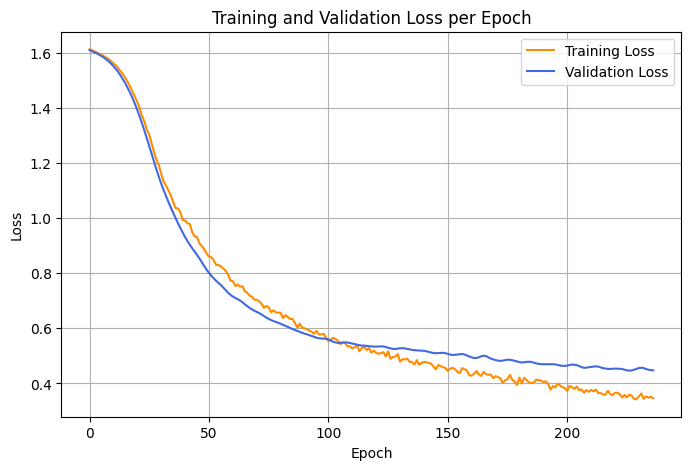

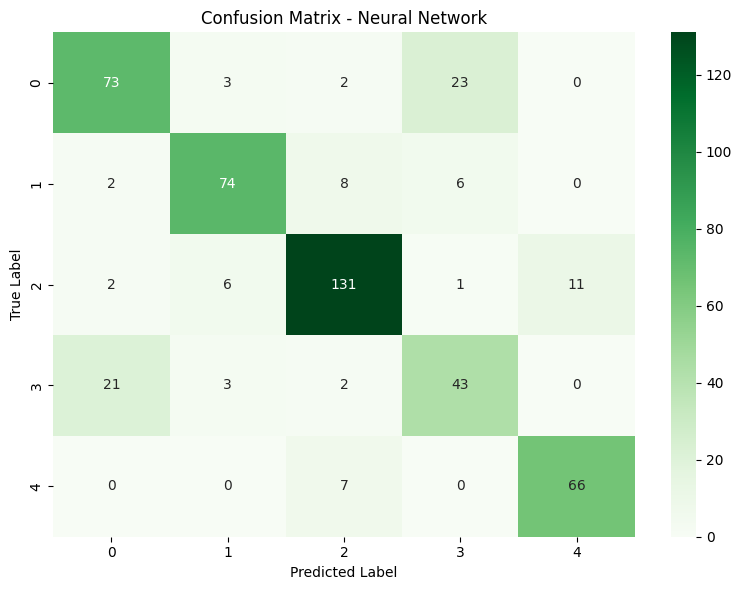

In [38]:
# Initialize model
net = Net()

# Convert data to tensors
x_train_tensor = torch.from_numpy(X_train_scaled).float()
y_train_tensor = torch.from_numpy(y_train.values).long()
x_val_tensor = torch.from_numpy(X_test_scaled).float()
y_val_tensor = torch.from_numpy(y_test.values).long()

# Optimizer and loss
optimizer = torch.optim.AdamW(net.parameters(), lr=0.001, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

train_losses = []
val_losses = []

# Early stopping
best_val_loss = float('inf')
patience = 10
epochs_no_improve = 0
best_model_state = None

# Training loop
max_epochs = 1000
for epoch in range(1, max_epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    net.eval()
    with torch.no_grad():
        val_outputs = net(x_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())
    if epoch % 50 == 0 or epoch == 1:
        print(f"Epoch {epoch}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")
    
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        best_model_state = net.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print(f"Epoch {epoch}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")
        print(f"\nEarly stopping at epoch {epoch}")
        break
    
# Plot loss curves
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss', color='darkorange')
plt.plot(val_losses, label='Validation Loss', color='royalblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.grid(True)
plt.legend()

# Load best model
if best_model_state is not None:
    net.load_state_dict(best_model_state)

# Evaluation
net.eval()
with torch.no_grad():
    train_preds = net(x_train_tensor).argmax(dim=1).numpy()
    val_preds = net(x_val_tensor).argmax(dim=1).numpy()
    train_labels = y_train_tensor.numpy()
    val_labels = y_val_tensor.numpy()
    


# Metrics
val_accuracy = accuracy_score(val_labels, val_preds)
print(f"Neural Network - Accuracy: {val_accuracy:.4f}")
print("\nNeural Network - Classification Report:")
print(classification_report(val_labels, val_preds))

# Confusion Matrix
cm_nn = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Neural Network')
plt.tight_layout()
plt.show()

# Save model
torch.save(net.state_dict(), 'models/neural_network_model.pth')

#### Random Forest

Random Forest - Accuracy: 0.8740

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       101
           1       0.84      0.93      0.88        90
           2       0.91      0.91      0.91       151
           3       0.77      0.78      0.78        69
           4       0.90      0.88      0.89        73

    accuracy                           0.87       484
   macro avg       0.87      0.87      0.87       484
weighted avg       0.88      0.87      0.87       484



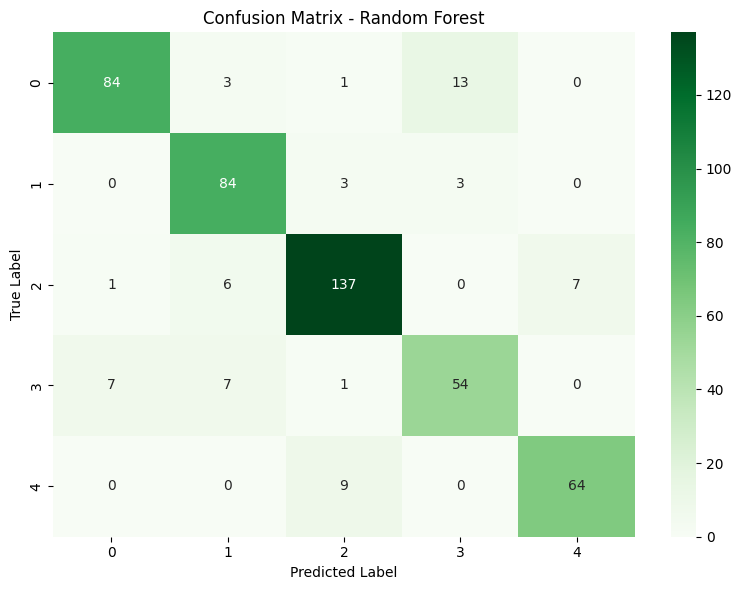

['models/random_forest_model.pkl']

In [15]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

# Save model
joblib.dump(rf_model, 'models/random_forest_model.pkl')

#### Gradient Boosting

Gradient Boosting - Accuracy: 0.9029

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       101
           1       0.90      0.93      0.92        90
           2       0.93      0.94      0.94       151
           3       0.79      0.87      0.83        69
           4       0.93      0.90      0.92        73

    accuracy                           0.90       484
   macro avg       0.90      0.90      0.90       484
weighted avg       0.90      0.90      0.90       484



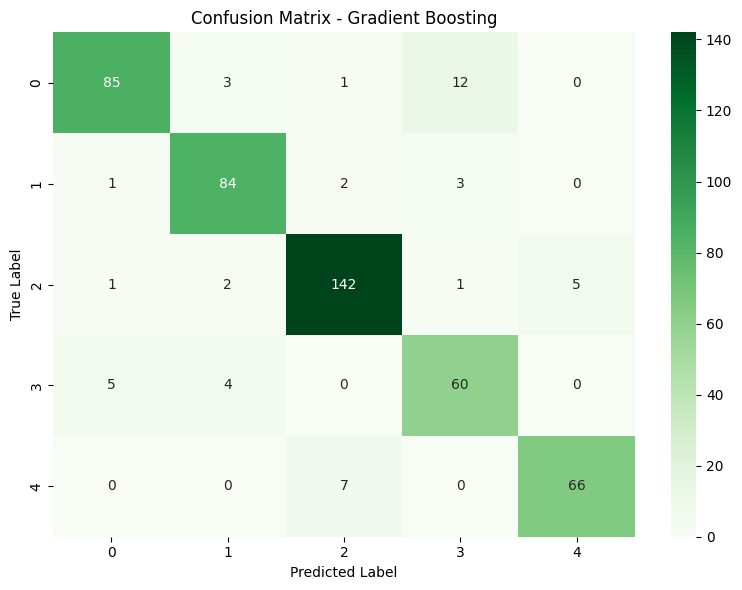

['models/gradient_boosting_model.pkl']

In [16]:
# Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42, learning_rate=0.17)
gb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test_scaled)

# Metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting - Accuracy: {accuracy_gb:.4f}")
print("\nGradient Boosting - Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Gradient Boosting')
plt.tight_layout()
plt.show()

# Save model
joblib.dump(gb_model, 'models/gradient_boosting_model.pkl')

Stacking Ensemble - Accuracy: 0.9070

Stacking Ensemble - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.89       101
           1       0.92      0.96      0.94        90
           2       0.94      0.93      0.94       151
           3       0.78      0.87      0.82        69
           4       0.92      0.92      0.92        73

    accuracy                           0.91       484
   macro avg       0.90      0.90      0.90       484
weighted avg       0.91      0.91      0.91       484



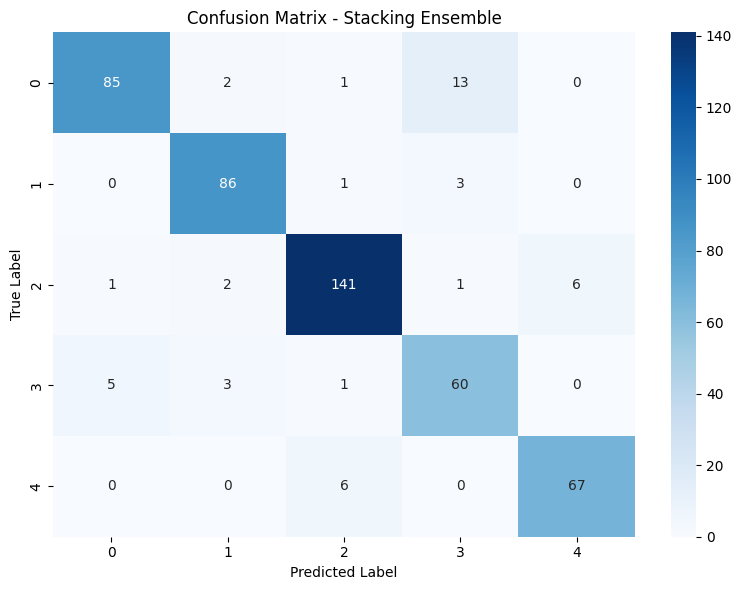

In [40]:

# Load scikit-learn models
rf_model = joblib.load('models/random_forest_model.pkl')
gb_model = joblib.load('models/gradient_boosting_model.pkl')

# Load PyTorch model
net = Net()
net.load_state_dict(torch.load('models/neural_network_model.pth'))
net.eval()

# Convert test data to tensors
x_val_tensor = torch.from_numpy(X_test_scaled).float()

# Generate prediction probabilities
rf_probs = rf_model.predict_proba(X_test_scaled)
gb_probs = gb_model.predict_proba(X_test_scaled)

with torch.no_grad():
    nn_logits = net(x_val_tensor)
    nn_probs = F.softmax(nn_logits, dim=1).numpy()

# Stack predictions as features for meta-model
stacked_features = np.hstack((rf_probs, gb_probs, nn_probs))

# Train meta-classifier
meta_model = LogisticRegression(max_iter=1000)
meta_model.fit(stacked_features, y_test)

# Predict final output
y_pred_ensemble = meta_model.predict(stacked_features)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Stacking Ensemble - Accuracy: {accuracy:.4f}")
print("\nStacking Ensemble - Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Stacking Ensemble')
plt.tight_layout()
plt.show()